Import the modules that will be used.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. Dot product between two vectors
$$
\mathbf{a}\cdot\mathbf{b} = \sum_{i=1}^{n} a_i b_i
$$

There are n multiplications and (n-1) additions in this, meaning the total is $operations(n) = n + (n-1)$

As n tends to infinity $\text{operations}(n) \sim 2n \Rightarrow O(n)$


2. Matrix-vector product
$$\mathbf{y} = A \mathbf{x}, \; y_i = \sum_{j=1}^{n} a_{ij} x_j$$

For each of the $n$ rows in matrix A, there are $n$ multiplications and $n-1$ additions
$$
\text{operations}(n) = n^2 \text{ multiplications} + n(n-1) \text{ additions}
\;\;\sim\;\; 2n^2
\;\;\Rightarrow\;\; O(n^2)
$$
3. Matrix-matrix product
$$
C = AB, \qquad
c_{ij} = \sum_{k=1}^{n} a_{ik} \, b_{kj}
$$

For every element in matrix C, it is made by calculating the dot product between two vectors of length $n$. We already know that the complexity of a dot product is $O(n)$

As C has $n$ rows and $n$ columns, it has $n^2$ elements made from $n^2$ dot products

Therefore as it takes $O(n)$ work for each of the $n^2$ elements, the complexity must be $O(n^3)$
$$
\text{operations}(n) = n^3 \text{ multiplications} + n^2(n-1) \text{ additions}
\;\;\sim\;\; 2n^3
\;\;\Rightarrow\;\;O(n^3)
$$

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [10]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

/tmp/ipykernel_3282/1108553842.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return factorial(n - 1)*n


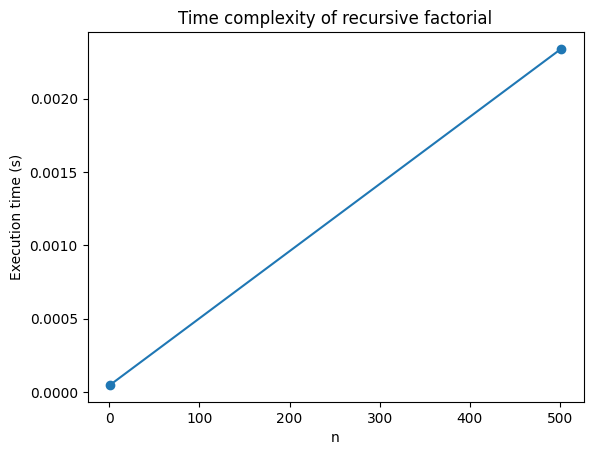

In [12]:
import time

ns = np.arange(1, 1000, 500)
times = []

for n in ns:
    start = time.time()
    factorial(n)
    end = time.time()
    times.append(end - start)

plt.plot(ns, times, 'o-')
plt.xlabel("n")
plt.ylabel("Execution time (s)")
plt.title("Time complexity of recursive factorial")
plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [ ]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [ ]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [2]:
import time

N = [2**k for k in range(2, 12)]  
times = []
for n in N:
    A = np.random.rand(n, n)               
    t0 = time.perf_counter()
    np.linalg.slogdet(A)              
    times.append(time.perf_counter() - t0)


Plot result:

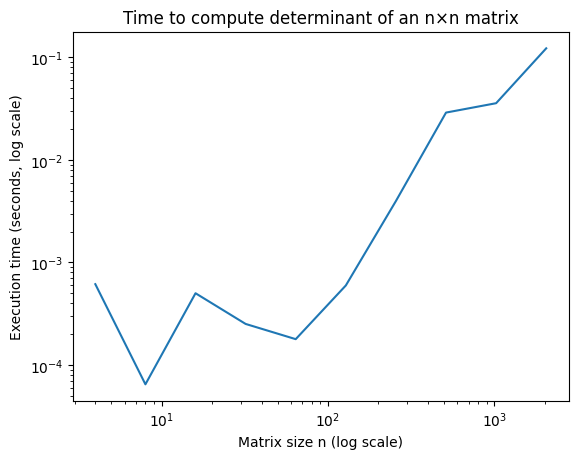

In [3]:
plt.loglog(N, times)
plt.xlabel("Matrix size n (log scale)")
plt.ylabel("Execution time (seconds, log scale)")
plt.title("Time to compute determinant of an n×n matrix")
plt.show()